# Colab


*   ##  mount drive

*   ## download from link directly to your drive

*   ## unzip a folder in drive




In [22]:
# # to be able to read and add files to your google drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [19]:
#!pip install wget

In [2]:
# #download from a link

#import wget
#url =  '' ## the download link
#destination = '/content/drive/My Drive/CIT651/heart.zip'  
#wget.download(url, destination)


In [1]:
 #UnZip file on drive

#import zipfile
#zip_ref = zipfile.ZipFile('/content/drive/My Drive/CIT651/heart.zip', 'r')
#zip_ref.extractall('/content/drive/My Drive/CIT651/')
#zip_ref.close()


#  **Pandas**

# Read CSV, Crosstab

In [29]:
# start with pandas
import pandas as pd

In [30]:
#read csv file
table = pd.read_csv('D:\desktop\heart.csv')

# display records, shapes and data types

In [31]:
table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* **display the last 3 records of the table**

In [32]:
## your code here
table.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


 **display the shape and the size of the table**

* **shape**

In [33]:
table.shape



(303, 14)

* **size:** total number of cells

In [34]:
table.size


4242

* **number of samples in the dataset**

In [35]:
## your code here
len(table)


303

* **print columns names**

In [36]:
## your code here
table.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

* **print columns data types**

In [37]:
## your code here *****************************************
table.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Selection

* **select the age column**

In [38]:
## your code here
table.age


0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

* **select the first 3 rows in the age column**

In [78]:
## your code here
table.age[0:3]


0    63
1    37
2    41
Name: age, dtype: int64

* **select age, fbs and target columns**

In [47]:
## your code here
table.loc[:, ["age", "fbs", "target"]]

,age,fbs,target
0,63,1,1
1,37,0,1
2,41,0,1
3,56,0,1
4,57,0,1
...,...,...,...
298,57,0,0
299,45,0,0
300,68,1,0
301,57,0,0


* **select age, fbs and target columns and rows from 10 to 15:** use both loc and iloc

In [48]:
## your code here #loc
table.loc[:, ["age", "fbs", "target"]][10: 15]



,age,fbs,target
10,54,0,1
11,48,0,1
12,49,0,1
13,64,0,1
14,58,1,1


In [60]:
## your code here #iloc  columns: 0, 5, 13
table.iloc[10:15, [0, 5, 13]]



,age,fbs,target
10,54,0,1
11,48,0,1
12,49,0,1
13,64,0,1
14,58,1,1


# value counts

###  get the number of heart attack and non heart attack samples in the data
* **use value_counts()**

In [63]:
## your code here
table['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

* **get their probabilites from the dataset**

In [66]:
## your code here
table['target'].value_counts()/len(table['target'])


1    0.544554
0    0.455446
Name: target, dtype: float64

* ### get the probabilities of each gender of people with heart attack

In [67]:
## your code here
table[table.target==1].sex.value_counts()/len(table[table.target==1])


1    0.563636
0    0.436364
Name: sex, dtype: float64

* ### get the probabilities of heart vs no heart attack in the males

In [68]:
## your code here
table[table.sex==1].target.value_counts()/len(table[table.sex==1])



0    0.550725
1    0.449275
Name: target, dtype: float64

# crosstab

In [113]:
pd.crosstab(table.sex, table.target)

target,0,1
sex,,
0,24,72
1,114,93


* **rename target 1 to 'yes', and 0 to 'no'** 
* **rename gender 1 to 'male', and 0 to 'female'**


In [114]:
## your code here

table['attack'] = table.target.map(lambda x: 'yes' if x==1 else 'no')
table['gender'] = table.sex.map(lambda x: 'male' if x==1 else 'female')
pd.crosstab(table.sex, table.target, margins = True)


target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


***Exercise*** 

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* create new column 'bloodSugar' with values 'Yes' or 'No'

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* convert chest pain column values to their corresponding meanings




In [104]:
## code here
dicto = {
     0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'
}
table['bloodSugar'] = table.fbs.map(lambda x: 'yes' if x == 1 else 'no')

In [105]:
table['chestPain'] = table.cp.map(lambda x: dicto.get(x,0))
table['chestPain']

0          asymptomatic
1      non-anginal pain
2       atypical angina
3       atypical angina
4        typical angina
             ...       
298      typical angina
299        asymptomatic
300      typical angina
301      typical angina
302     atypical angina
Name: chestPain, Length: 303, dtype: object

In [106]:
table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,attack,gender,bloodSugar,chestPain
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,yes,male,yes,asymptomatic
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,yes,male,no,non-anginal pain
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,yes,female,no,atypical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,yes,male,no,atypical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,yes,female,no,typical angina


In [107]:
pd.crosstab(table.attack, table.bloodSugar, margins = True)

bloodSugar,no,yes,All
attack,,,
no,116,22,138
yes,142,23,165
All,258,45,303


In [108]:
pd.crosstab( [table.attack, table.bloodSugar], [table.gender,   table.chestPain])

gender                  female                                   \
chestPain         asymptomatic atypical angina non-anginal pain   
attack bloodSugar                                                 
no     no                    0               1                1   
       yes                   0               1                0   
yes    no                    3              15               30   
       yes                   1               1                4   

gender                                   male                  \
chestPain         typical angina asymptomatic atypical angina   
attack bloodSugar                                               
no     no                     16            6               7   
       yes                     5            1               0   
yes    no                     18            9              22   
       yes                     0            3               3   

gender                                             
chestPain         non-anginal pain typical angina  
attack bloodSugar                                  
no     no                       14             71  
       yes                       3             12  
yes    no                       25             20  
       yes                      10              1

* ## plot a stacked bar to visualize the gender vs attack

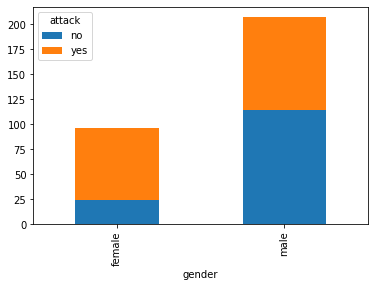

In [77]:
## your code here
pd.crosstab(table.gender, table.attack).plot(kind = 'bar', stacked = True)




[Pandas Crosstab](https://pbpython.com/pandas-crosstab.html)

In [78]:
df = table[['age', 'target']][:3]
df

,age,target
0,63,1
1,37,1
2,41,1


In [79]:
df.rename(columns = {'target':'heart_attack'})
#df.rename(columns = {'target':'heart_attack'}, inplace=True) inplace() updates the changes in the original dataframe 

,age,heart_attack
0,63,1
1,37,1
2,41,1


In [80]:
df.T  ## transpose of the table

,0,1,2
age,63,37,41
target,1,1,1


# Addition

In [120]:
df1 = table[['age', 'target']][:3]
df2 = table[['age', 'target']][3:5]

In [121]:
df1

,age,target
0,63,1
1,37,1
2,41,1


In [122]:
df2

,age,target
3,56,1
4,57,1


In [123]:
df1.append(df2)

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


In [124]:
df1

,age,target
0,63,1
1,37,1
2,41,1


# Iteration / Sorting

In [87]:
for key in table:
    print(key)
    

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
gender
attack
bloodSugar


In [125]:
for key, value in df1.iteritems():
  print(key, value)  ## they are just copies!

age 0    63
1    37
2    41
Name: age, dtype: int64
target 0    1
1    1
2    1
Name: target, dtype: int64


In [126]:
table[['age', 'target']].sort_values(['target', 'age'])[:5]  ## sort by 'age' column 

,age,target
227,35,0
239,35,0
259,38,0
212,39,0
175,40,0


# from pandas to numpy

In [82]:
import numpy as np

In [83]:
age_cp = table[['age', 'cp']][:3].values

In [84]:
type(age_cp)

numpy.ndarray

In [89]:
age_cp

array([[63,  3],
       [37,  2],
       [41,  1]], dtype=int64)

In [90]:
table[['age', 'cp']][:3].values

array([[63,  3],
       [37,  2],
       [41,  1]], dtype=int64)

In [91]:
df2=pd.DataFrame(np.random.rand(3,3),index=['X','Y','Z'],columns=['C1','C2','C3'])
print(df2)

         C1        C2        C3
X  0.466471  0.744143  0.464536
Y  0.991818  0.660938  0.009948
Z  0.213529  0.465599  0.959175
